In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


In [5]:
# Crear un DataFrame con los datos proporcionados
data = pd.read_csv("student.csv")

df = pd.DataFrame(data)

# Codificar variables categóricas
label_encoders = {}
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for column in categorical_columns:
	label_encoders[column] = LabelEncoder()
	df[column] = label_encoders[column].fit_transform(df[column])

# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(['Index', 'Id', 'Grade'], axis=1)
y = df['Grade']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy*100:_.2f}%")

Precisión del modelo: 20.69%


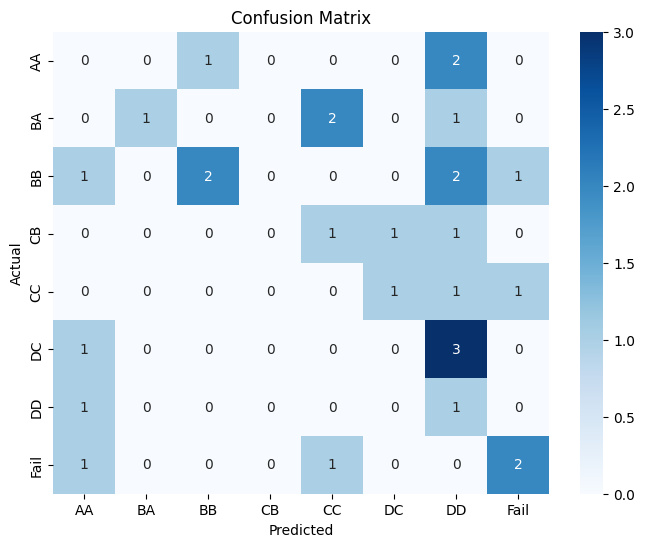

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders['Grade'].classes_, yticklabels=label_encoders['Grade'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()